#Data management: cleansing, integration and  a first analysis

Our data: https://github.com/SunnyShikhar/music-datamining

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series

In [26]:
#creating the df from the csv file
df_music = pd.read_csv('musicData.csv')

# creating a new column containing the gender as a numerical value (in case needed), 
# we can avoid adding this new column if it's useless
num_sex=[]
for value in df_music['gender']:
  if value == 'Male':
    num_sex.append(0)
  elif value == 'Female':
    num_sex.append(1)
  else :
    num_sex.append(2)
num_sex_col= pd.Series(num_sex).astype(int)
df_music['sex_n']=num_sex_col

#same for the amount of music and for trauma and genre

#amount of music listened
num_h=[]
for value in df_music['amount_music']:
  if "0" in value :
    num_h.append(0)
  elif '2' in value and '-' in value:
    num_h.append(1)
  elif '2+' in value  :
    num_h.append(2)
  elif '3+' in value:
    num_h.append(3)
  else:
    num_h.append(value)
num_h_col= pd.Series(num_h).astype(int)
df_music['hours_n']=num_h_col

# trauma
num_tr=[]
for value in df_music['trauma']:
  if value == 'Yes':
    num_tr.append(0)
  elif value == 'No':
    num_tr.append(1)
  
num_tr_col= pd.Series(num_tr).astype(int)
df_music['tr_n']=num_tr_col


#printing the head of the dataframe
df_music.head()

,timestamp,gender,age,amount_music,life_enjoyment,resilience,balanced_life,emotional_flex,self_actualization,song1,...,liveness,valence,tempo,instrumental,acoustic,popularity,health_categorical,sex_n,hours_n,tr_n
0,05/11/2016 14:34:00,Male,18 - 30,1 - 2,4,3,5,3,6,Too Good Drake,...,0.1100,0.5715,98.3680,0.000025,0.281600,71.500000,1.0,0,1,1
1,05/11/2016 14:45:26,Male,18 - 30,1 - 2,6,6,3,5,5,Put that on my set asap rocky ft skepta,...,0.1160,0.1560,121.1270,0.000000,0.056600,65.000000,1.0,0,1,1
2,05/11/2016 14:45:41,Female,18 - 30,0 - 1,5,5,4,4,5,Fireproof Coleman Hell,...,0.1835,0.6185,125.0090,0.000023,0.053800,63.500000,1.0,1,0,1
3,05/11/2016 14:45:55,Male,18 - 30,2+,3,6,5,5,5,Eyes Nose Lips TaeYang,...,0.1489,0.5960,113.5760,0.000001,0.348867,60.333333,1.0,0,2,1
4,05/11/2016 14:49:15,Female,18 - 30,0 - 1,2,5,2,1,5,Sugar Wanderlust,...,0.2155,0.2915,122.4605,0.464350,0.599500,3.000000,0.0,1,0,0


In [27]:
#null values
pd.isnull(df_music).sum()

timestamp             0
gender                0
age                   0
amount_music          0
life_enjoyment        0
resilience            0
balanced_life         0
emotional_flex        0
self_actualization    0
song1                 0
song2                 0
song3                 0
trauma                0
id                    0
total_health          0
energy                5
dance                 5
liveness              5
valence               5
tempo                 5
instrumental          5
acoustic              5
popularity            5
health_categorical    0
sex_n                 0
hours_n               0
tr_n                  0
dtype: int64

In [ ]:
a=list(df_music['amount_music'])
a
# manually checking these values we can notice that some of them are not included in the 3 considered intervals ( e.g 3+, 5 and 9)

In [60]:
df_music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           235 non-null    object 
 1   gender              235 non-null    object 
 2   age                 235 non-null    object 
 3   amount_music        235 non-null    object 
 4   life_enjoyment      235 non-null    int64  
 5   resilience          235 non-null    int64  
 6   balanced_life       235 non-null    int64  
 7   emotional_flex      235 non-null    int64  
 8   self_actualization  235 non-null    int64  
 9   song1               235 non-null    object 
 10  song2               235 non-null    object 
 11  song3               235 non-null    object 
 12  trauma              235 non-null    object 
 13  id                  235 non-null    int64  
 14  total_health        235 non-null    int64  
 15  energy              230 non-null    float64
 16  dance   

# Data cleansing!

Do some data cleanses:
- remove blank spaces
 - separate titles from artists;
 - gain data from links to youtube; <br>

The authors of the previous studies seem to have done this searching for the strings containing title + artist in the spotify api.

[Library for splitting song names from artists](https://pypi.org/project/SongNameSplit/) <br>
[Advanced query syntax Spotify](http://web.archive.org/web/20120704131650/http://www.spotify.com/us/about/features/advanced-search-syntax/) (boh???)

https://github.com/enjuichang/PracticalDataScience-ENCA (useful?)

# Descriptive statistics

In [28]:
df_music.describe().transpose()
#we could make observations about mean, median, standard deviation (?)

,count,mean,std,min,25%,50%,75%,max
life_enjoyment,235.0,3.434043,1.413802,0.000000,3.000000,3.000000,4.000000,6.000000
resilience,235.0,4.017021,1.310594,0.000000,3.000000,4.000000,5.000000,6.000000
balanced_life,235.0,3.629787,1.406322,0.000000,2.500000,4.000000,5.000000,6.000000
emotional_flex,235.0,3.651064,1.529465,0.000000,3.000000,4.000000,5.000000,6.000000
self_actualization,235.0,4.306383,1.355490,0.000000,4.000000,5.000000,5.000000,6.000000
id,235.0,117.000000,67.982841,0.000000,58.500000,117.000000,175.500000,234.000000
total_health,235.0,19.038298,4.715249,6.000000,16.000000,20.000000,22.000000,30.000000
energy,230.0,0.632621,0.140835,0.143000,0.544250,0.640667,0.712167,0.967667
dance,230.0,0.624728,0.120391,0.175000,0.547500,0.637167,0.709500,0.896000
liveness,230.0,0.187970,0.095937,0.068300,0.119208,0.164333,0.221000,0.799000


We can notice that the mean of the popularity of our dataset is 62.57 (on a maximum of 100).<br>
The mean of total_health is 19 (on a maximum of 30).<br>

In [ ]:
#check artist and genres by merging with the csv song_metrics.csv

# Correlation Map

As the previous analyisis shows, no correlation emerges between mental health and music features:

[Text(0.5, 0, 'life_enjoyment'),
 Text(1.5, 0, 'resilience'),
 Text(2.5, 0, 'balanced_life'),
 Text(3.5, 0, 'emotional_flex'),
 Text(4.5, 0, 'self_actualization'),
 Text(5.5, 0, 'id'),
 Text(6.5, 0, 'total_health'),
 Text(7.5, 0, 'energy'),
 Text(8.5, 0, 'dance'),
 Text(9.5, 0, 'liveness'),
 Text(10.5, 0, 'valence'),
 Text(11.5, 0, 'tempo'),
 Text(12.5, 0, 'instrumental'),
 Text(13.5, 0, 'acoustic'),
 Text(14.5, 0, 'popularity'),
 Text(15.5, 0, 'health_categorical'),
 Text(16.5, 0, 'sex_n'),
 Text(17.5, 0, 'hours_n'),
 Text(18.5, 0, 'tr_n')]

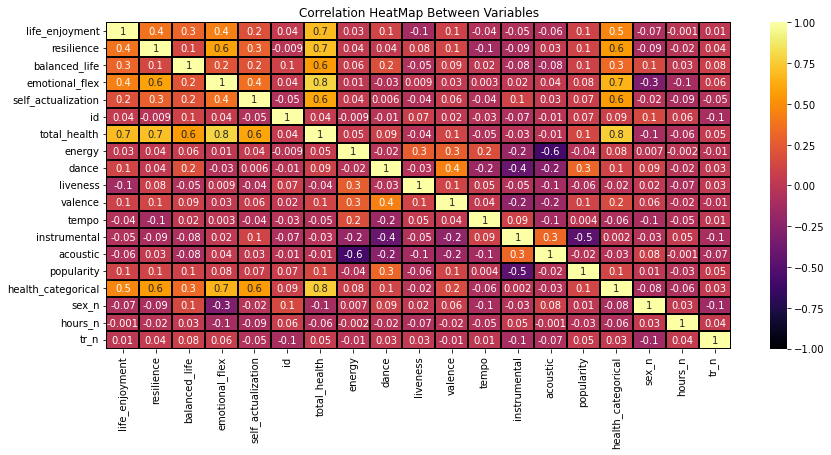

In [55]:
corr_df = df_music.corr(method='pearson')
plt.figure(figsize = (14,6))
heatmap=sns.heatmap(corr_df, annot=True, fmt ='.1g', vmin =-1, center=0, cmap='inferno', linewidths=1, linecolor='Black')
heatmap.set_title('Correlation HeatMap Between Variables')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

# Gender was missing because it has not integer/float values - 
# I converted it in numerical values (0= males, 1=female) to include it, don't know if it is correct

#let's see if after cleaning the data the heatmap changes

Further investigations have to be done regarding the eventual correlations of the variable genre with other ones.

In [ ]:
#plt.figure(figsize=(10,6))
#sns.regplot(data = df_music, y = 'hours_n', x = 'tr_n', color='c').set(title = 'x vs y Correlation')

# Describing the audience of the study
Here we could try describing interesting patterns but the problem is that we don't have meaningful correlations. Should we include data on genres and artists from other csvs?

The EDA that we use as a starting point finds these **4 clusters** among people involved in the survey:

* **Cluster 1**: Energetic Radio Listeners. People who listen to high danceability and energetic songs, that are just popular to be on radio or were once popular. (For example: Stay - Kygo, Beibs In The Trap - Travis Scott from cluster 1 listeners)

* **Clsuter 2**: Soothing Underground Listeners. People who listen to low energy, danceability and popularity songs that are relaxing and soothing. (For example: Honey, Save Me From My Falsehoods - Asha Jefferies from cluster 2 listeners)

* **Cluster 3**: Upbeat Dancers. People listening to fast tempo and highly danceable songs, but lacking energy and intensity. (For example: Location - Khalid, Drama - Roy Woods, Dat $tick - Rich Chigga (how!?) from cluster 3 listeners.)

* **Cluster 4**: Underground Energetic/Indie Listeners. People listening to high energy and low danceability music, often alternative rock/screamo/indie music that's not popular on Spotify or energetic underground rap/hip-hop music. (For example: Chloroform - Phoenix, Aftermanth - Crown The Empire, Just Might Be - Young Thug from cluster 4 listeners.)





Could we use this info?  **Maybe we could look for other features of these 4 clusters**.

## distribution of mental health

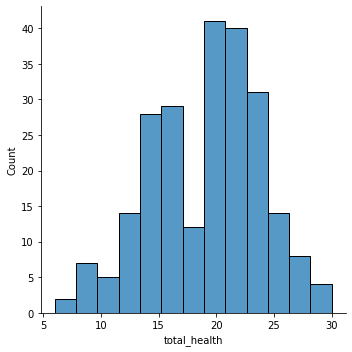

In [14]:
#distribution of mental health
sns.displot(data=df_music, x='total_health')

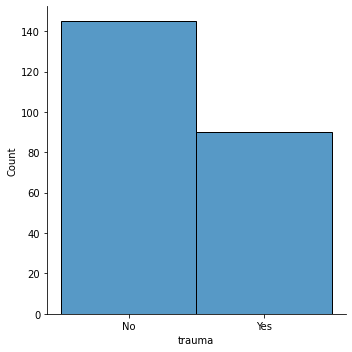

In [23]:
#distribution of recent experience of trauma
sns.displot(data=df_music, x='trauma')

In [ ]:
# Create some visualizations
sns.relplot(
    data=df_music,
    x="acoustic", y="valence")

In [ ]:
# 
sns.relplot(
    data=df_music, kind="line",
    x="tr_n", y="hours_n"
)


In [ ]:
sns.relplot(
    data=df_music, kind="line",
    x="tr_n", y="acoustic"
)

In [ ]:
sns.relplot(
    data=df_music, kind="line",
    x="balanced_life", y="dance"
)

# <h1>Analysis of song_metrics.csv file containing more specific songs data</h1>

Do some data cleanses:
- remove blank spaces
 - separate titles from artists;
 - gain data from links to youtube;


In [30]:
song_metrics = pd.read_csv('song_metrics.csv')
song_metrics.head()

,Unnamed: 0,id,songs,song,artist,energy,dance,liveness,valence,tempo,instrumental,acoustic,popularity,genres
0,0,0,Too Good Drake,Too Good,Drake,0.641,0.82,0.102,0.395,117.974,0.000051,0.0662,77.0,"['canadian hip hop', 'canadian pop', 'hip hop'..."
1,1,0,Trust Nobody Selena Gomez Tory Lanez Cashmere Cat,Trust Nobody (feat. Selena Gomez & Tory Lanez),Cashmere Cat,0.625,0.49,0.118,0.748,78.762,0.000000,0.4970,66.0,"['dance pop', 'downtempo', 'edm', 'electropop'..."
2,2,0,Don't Wanna Know Maroon5 Kendrick Lamar,Don't Wanna Know Maroon5 Kendrick Lamar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,Put that on my set asap rocky ft skepta,Put that on my set asap rocky ft skepta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,High rhe beach lana del rey,High rhe beach lana del rey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#null values
pd.isnull(song_metrics).sum()

Unnamed: 0        0
id                0
songs             0
song              1
artist          110
energy          110
dance           110
liveness        110
valence         110
tempo           110
instrumental    110
acoustic        110
popularity      110
genres          110
dtype: int64

We can notice that we miss information about the **genres** of the songs and about their **artists** for 110 songs, therefore an **integration** of our data with spotify/ musicbrainz/wikidata data is needed. <br>
Most of the missing features of songs are dued to a missing separation of the title from the artist names or to typos in the titles. A data cleansing is thereforenecessary before the data integration.

Furtheremore, we have the genres contained in a list and this makes it difficult to rely on this column for gaining genre data. **Should we rely only on Wikidata for the genres?** 

In [30]:
song_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    705 non-null    int64  
 1   id            705 non-null    int64  
 2   songs         705 non-null    object 
 3   song          704 non-null    object 
 4   artist        595 non-null    object 
 5   energy        595 non-null    float64
 6   dance         595 non-null    float64
 7   liveness      595 non-null    float64
 8   valence       595 non-null    float64
 9   tempo         595 non-null    float64
 10  instrumental  595 non-null    float64
 11  acoustic      595 non-null    float64
 12  popularity    595 non-null    float64
 13  genres        595 non-null    object 
dtypes: float64(8), int64(2), object(4)
memory usage: 77.2+ KB


In [71]:
noNa=song_metrics.fillna("")

## 10 most popular songs
From the dataframe song_metrics we can obtain the most/less popular songs in our dataset (where the popularity is a value from 0 to 100 gained from Spotify). The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.

**To do**: Checking the measures of central tendencies for the most popular songs.

In [31]:
no_id =song_metrics.drop(['id','Unnamed: 0','songs'], axis=1)
nod=no_id.drop_duplicates()
most_popular=nod.query('popularity>80', inplace=False).sort_values('popularity', ascending = False)
most_popular[:10]

,song,artist,energy,dance,liveness,valence,tempo,instrumental,acoustic,popularity,genres
310,Psycho (feat. Ty Dolla $ign),Post Malone,0.559,0.739,0.1120,0.439,140.124,0.000000,0.5800,92.0,"['pop', 'rap']"
615,Congratulations,Post Malone,0.804,0.630,0.2530,0.492,123.146,0.000000,0.2150,88.0,"['pop', 'rap']"
56,Closer,The Chainsmokers,0.524,0.748,0.1110,0.661,95.010,0.000000,0.4140,88.0,"['edm', 'electropop', 'pop', 'tropical house']"
82,goosebumps,Travis Scott,0.728,0.841,0.1490,0.430,130.049,0.000000,0.0847,87.0,"['pop', 'pop rap', 'rap']"
654,Photograph,Ed Sheeran,0.379,0.614,0.0986,0.201,107.989,0.000464,0.6070,86.0,['pop']
25,Location,Khalid,0.449,0.736,0.0898,0.326,80.126,0.000162,0.3300,86.0,"['indie r&b', 'pop', 'rap']"
526,Thinking Out Loud,Ed Sheeran,0.445,0.781,0.1840,0.591,78.998,0.000000,0.4740,86.0,['pop']
129,That's What I Like,Bruno Mars,0.560,0.853,0.0944,0.860,134.066,0.000000,0.0130,86.0,"['pop', 'post-teen pop']"
133,In The End,Linkin Park,0.853,0.542,0.1080,0.370,105.256,0.000000,0.0103,85.0,"['alternative metal', 'nu metal', 'post-grunge..."
388,Say You Won't Let Go,James Arthur,0.557,0.358,0.0902,0.494,85.043,0.000000,0.6950,85.0,"['dance pop', 'neo mellow', 'pop', 'post-teen ..."


## 10 less popular songs
Let it go has 0 popularity. seems strange

In [32]:
sorted_df = nod.sort_values('popularity', ascending= True ).head(10)
sorted_df

,song,artist,energy,dance,liveness,valence,tempo,instrumental,acoustic,popularity,genres
440,It Can Happen To You,Chris Smith,0.566,0.800,0.1580,0.674,93.017,0.000297,0.41600,0.0,[]
493,That's Not Me (Karaoke Version) [Originally Pe...,Backing Force,0.776,0.954,0.0716,0.595,138.961,0.666000,0.36000,0.0,[]
218,"Let It Go (From ""Disney: Frozen"")",Melinda Keen,0.447,0.548,0.3660,0.235,136.886,0.000000,0.52300,0.0,[]
512,Yoga (Made Popular By Janelle Monae ft. Jidenn...,Party Tyme Karaoke,0.385,0.779,0.1910,0.540,129.980,0.669000,0.06970,0.0,['karaoke']
12,Sweet Sugar,Wanderlust,0.813,0.302,0.3680,0.339,126.965,0.082700,0.25500,0.0,"['peruvian indie', 'peruvian rock']"
88,Count On Me - Originally By Bruno Mars,Leopard Powered,0.160,0.569,0.1070,0.120,177.961,0.937000,0.97600,0.0,[]
695,If Today Is Your Last Day (In the Style of Nic...,Mr. Entertainer Karaoke,0.497,0.573,0.3540,0.589,90.021,0.032700,0.00001,0.0,['karaoke']
599,Kiss It Better (Originally Performed By Rhianna),Sunfly Karaoke,0.418,0.484,0.0625,0.542,190.237,0.408000,0.00211,1.0,['karaoke']
191,"Don't Wanna Know - 11 Hearts Mix Maroon 5 , Ke...",Amin Cruiser,0.575,0.599,0.0937,0.213,120.913,0.253000,0.66600,1.0,[]
559,Broccolli,XENPÄI,0.309,0.775,0.1090,0.483,112.027,0.000000,0.28300,2.0,[]


## Analysing the popularity variable
We could make further investigations about the most present songs in the dataset and check if our dataset contains more popular or not popular songs

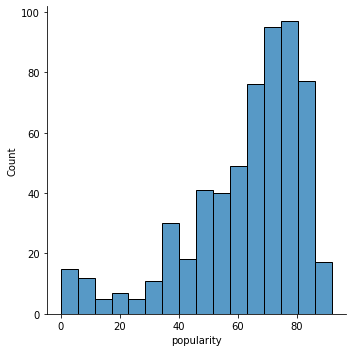

In [33]:
#displot function (DIS for distribution) for visualizing the distribution of the popularity variable
sns.displot(data=song_metrics, x='popularity')

⬇ Here I used 50 as a threshold to check the amount of popular/unpopular songs. The mean of popularity is 62.sth but we will check it again after the data cleaning.
:

In [110]:
x=song_metrics.query('popularity>50')
len(x)

459

In [111]:
x=song_metrics.query('popularity<50')
len(x)

128

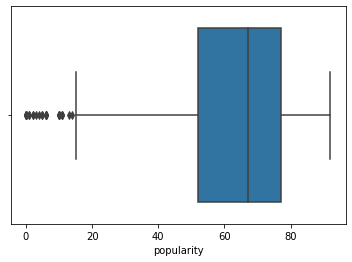

In [114]:
sns.boxplot(data=song_metrics, x='popularity')

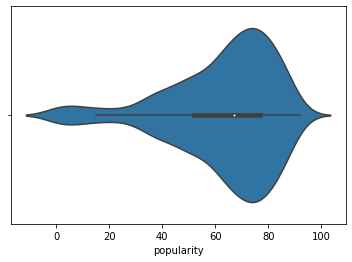

In [115]:
sns.violinplot(data=song_metrics, x='popularity')

We can observe that most of the songs have a medium to high popularity. Should we compare with a general dataset?


## most frequent **songs**
The most present songs in our dataset

In [135]:
song_metrics['song'].value_counts().nlargest(10)


Starboy                                       21
Closer                                        13
Fake Love                                     11
Don't Wanna Know (feat. Kendrick Lamar)        7
One Dance                                      7
Side To Side                                   6
That's What I Like                             6
We Don't Talk Anymore (feat. Selena Gomez)     5
Too Good                                       5
All We Know                                    5
Name: song, dtype: int64

## most frequent Artists

In [133]:
song_metrics['artist'].value_counts().nlargest(10)


Drake               31
The Weeknd          26
The Chainsmokers    20
Ariana Grande        9
Bruno Mars           9
Travis Scott         9
Kanye West           9
Maroon 5             8
Sia                  7
Adele                7
Name: artist, dtype: int64

## most frequent Genres

we have to fill the genre values! This will be done through Wikidata

In [136]:
song_metrics['genres'].value_counts().nlargest(10)


[]                                                                        33
['canadian hip hop', 'canadian pop', 'hip hop', 'pop rap', 'rap']         31
['canadian pop', 'pop', 'rap']                                            26
['dance pop', 'pop', 'post-teen pop']                                     21
['edm', 'electropop', 'pop', 'tropical house']                            20
['pop']                                                                   20
['hip hop', 'pop', 'pop rap', 'rap', 'southern hip hop', 'trap music']    14
['pop', 'pop rap', 'rap']                                                  9
['pop', 'post-teen pop']                                                   9
['pop rap', 'rap']                                                         9
Name: genres, dtype: int64

# Merging musicData and song_metrics
Could this merge be useful? Here we should have 3 rows for every id containing each the info of one of the 3 songs preferred. </br>
We have in this dataframe data about genres and artist aligned to mental health information.
Probably we have to remove the duplicate columns (the ones about tracks' energy, dance...).



In [ ]:
#here we merge the 2 dataframes
result = pd.merge(df_music, song_metrics, on="id")
result

In [ ]:
no_id =result.drop(['energy_y','dance_y','tempo_y', 'liveness_y', 'acoustic_y', 'valence_y', 'instrumental_y', 'popularity_y'], axis=1)
corr_df = no_id.corr(method='pearson')
plt.figure(figsize = (14,6))
heatmap=sns.heatmap(corr_df, annot=True, fmt ='.1g', vmin =-1, center=0, cmap='inferno', linewidths=1, linecolor='Black')
heatmap.set_title('Correlation HeatMap Between Variables')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

---
# **Data integration with spotify and wikidata**

---


* we must add the genre to all the songs taking it from wikidata
* we must add the artist when missing
* we must add energy, valence, tempo, ... where missing (should be the same row missing the genre and the artist)
* we could add the release date of songs?
* we could also add the text if we find it? and do a sentiment analysis for it? A source for the texts is the API of Genius Lyrics





# Wikidata

we could search for artists and genres in wikidata. We could prepare a list of titles/ uri (maybe uris are more correct) about which querying data.<br>
Some useful entities:


*   wd:Q134556 = single
*   wd:Q7366 = song

and properties:

*   wdt:P31 = instance of
*   wdt:P136 = genre 
*   wdt:P175 = performer
 


In [31]:
!pip install rdflib 
import rdflib
!pip install SPARQLWrapper
from SPARQLWrapper import SPARQLWrapper, JSON
import ssl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
# if you have mac and you run this locally, uncomment
#ssl._create_default_https_context = ssl._create_unverified_context

# get the endpoint API
wikidata_endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
# set the endpoint 
sparql_wd = SPARQLWrapper(wikidata_endpoint)


# prepare the values to be queried
#songs = "" #a string of titles
#artist = "" #string of artists
#we should obtain these 2 strings by joining the values of the corresponding columns in the dataframe.

#or (maybe better) we have to iterate on each row, take the song and artist and do the corresponding query
noNa=song_metrics.fillna("")
for index,row in noNa.iterrows():
  song_title = row["song"]
  performer = row["artist"]
  

# we type in the WHERE close this as the professor does in a tutorial for including a variable in the query:
# VALUES ?song {"""+songs+"""} . # look how we include a variable in a query string!

#we can run this only after cleaning the data!
  query = [""" 
        prefix rdfs:  <http://www.w3.org/2000/01/rdf-schema#> 
        PREFIX wd: <http://www.wikidata.org/entity/> 
        PREFIX wdt: <http://www.wikidata.org/prop/direct/> 
        PREFIX wikibase: <http://wikiba.se/ontology#> 

        SELECT ?s   ?performer
        WHERE 
        { 
          ?s wdt:P31 wd:Q134556;
            rdfs:label  """, "'", song_title, "'" , """ ;
          
            wdt:P175  ?performer .
          ?performer rdfs:label """, "'", performer, "'", """.  
        }     
    """]
  joined=" ".join(query)
  print(joined)
    # set the query
  sparql_wd.setQuery(joined)
    # set the returned format
  sparql_wd.setReturnFormat(JSON)
    # get the results
  results_songs = sparql_wd.query().convert()
  print(results_songs)


 
        prefix rdfs:  <http://www.w3.org/2000/01/rdf-schema#> 
        PREFIX wd: <http://www.wikidata.org/entity/> 
        PREFIX wdt: <http://www.wikidata.org/prop/direct/> 
        PREFIX wikibase: <http://wikiba.se/ontology#> 

        SELECT ?s   ?performer
        WHERE 
        { 
          ?s wdt:P31 wd:Q134556;
            rdfs:label   ' Too Good '  ;
          
            wdt:P175  ?performer .
          ?performer rdfs:label  ' Drake ' .  
        }     
    
{'head': {'vars': ['s', 'performer']}, 'results': {'bindings': []}}
 
        prefix rdfs:  <http://www.w3.org/2000/01/rdf-schema#> 
        PREFIX wd: <http://www.wikidata.org/entity/> 
        PREFIX wdt: <http://www.wikidata.org/prop/direct/> 
        PREFIX wikibase: <http://wikiba.se/ontology#> 

        SELECT ?s   ?performer
        WHERE 
        { 
          ?s wdt:P31 wd:Q134556;
            rdfs:label   ' Trust Nobody (feat. Selena Gomez & Tory Lanez) '  ;
          
            wdt:P175  ?performer .
   

QueryBadFormed: ignored

In [ ]:
# manipulate the result
for result in results_songs["results"]["bindings"]:
    print(result["s"]["value"],  result["performer"]["value"])

In [21]:
# if you have mac and you run this locally, uncomment
#ssl._create_default_https_context = ssl._create_unverified_context

# get the endpoint API
wikidata_endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"

# prepare the query : here a query retrieving the genre/performer of all songs having a specific title and performer
# we could use a similar query for retrieving the missing genres
my_query = """
PREFIX rdf:<http://www.w3.org/1999/02/22-rdf-syntax-ns#>
prefix rdfs:  <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX wd: <http://www.wikidata.org/entity/> 
PREFIX wdt: <http://www.wikidata.org/prop/direct/> 
PREFIX wikibase: <http://wikiba.se/ontology#> 

SELECT ?s  ?label ?labelgenre ?performerlabel
WHERE 
{?s wdt:P31 wd:Q134556.
 ?s rdfs:label ?label.
 ?s wdt:P136 ?genre.
 ?s wdt:P175 ?performer.
 ?performer rdfs:label ?performerlabel.
 ?genre rdfs:label ?labelgenre.
  FILTER (REGEX(?label, "Don't wanna know", "i")).
  FILTER(REGEX(?performerlabel, "Maroon 5", "i")).
  filter langMatches(lang(?labelgenre),"en").
}
limit 10
"""
# set the endpoint 
sparql_wd = SPARQLWrapper(wikidata_endpoint)
# set the query
sparql_wd.setQuery(my_query)
# set the returned format
sparql_wd.setReturnFormat(JSON)
# get the results
results = sparql_wd.query().convert()

In [22]:
# manipulate the result
for result in results["results"]["bindings"]:
    print(result["label"]["value"], result["labelgenre"]["value"], result["performerlabel"]["value"])

Don't Wanna Know tropical house Maroon 5
Don't Wanna Know tropical house Maroon 5
Don't Wanna Know tropical house Maroon 5
Don't Wanna Know tropical house Maroon 5
Don't Wanna Know tropical house Maroon 5
Don't Wanna Know tropical house Maroon 5
Don't Wanna Know tropical house Maroon 5
Don't Wanna Know tropical house Maroon 5
Don't Wanna Know tropical house Maroon 5
Don't Wanna Know tropical house Maroon 5


# Spotify api for extracting song feaures (and artists maybe)
(extracting a list of artists to compare with the strings values of the column 'songs' )

" The first thing we’ll look at is getting keys to use. For this, we need a [Spotify for developers](https://developer.spotify.com/) account. This is the same as a Spotify account, and doesn’t require Spotify Premium. From here, go to the dashboard and “create an app”. Now, we can access a public and private key, needed to use the API.
Spotify Credentials Storage and Access

Now that we have an app, we can get a client ID and a client secret for this app. Both of these will be required to authenticate with the Spotify web API for our application, and can be thought of as a kind of username and password for the application. It is best practice not to share either of these, but especially don’t share the client secret key. To prevent this, we can keep it in a separate file, which, if you’re using Git for version control, should be Gitignored.

Spotify credentials should be stored the in the a secret.txt file with the first line as the credential id and the second line as the secret key:
[Screen Shot 2021-12-18 at 12 10 03 AM](https://user-images.githubusercontent.com/55577469/146574104-804def73-54ec-449a-931c-86372d3a07a6.png)



To access this credentials, please use the following code:
```
with open("secret.txt") as f:
    secret_ls = f.readlines()
    cid = secret_ls[0][:-2]
    secret = secret_ls[1]
```

"

also: https://stepzen.com/blog/mashing-up-the-spotify-and-knowledge-graph-apis

 ## Spotipy

 Spotipy is a lightweight Python library for the Spotify Web API. With Spotipy you get full access to all of the music data provided by the Spotify platform.

[Link to spotipy library](https://spotipy.readthedocs.io/en/2.19.0/)



In [2]:
%pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.8/237.8 KB 12.1 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
# Authentication - without user
# we need to create the app
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)